In [1]:
import pandas as pd
import numpy as np

In [2]:
critics={
    'BTS':{'암수살인':5, '바울':4, '할로윈':1.5},
    '손흥민':{'바울':5, '할로윈':2},
    '레드벨벳':{'암수살인':2.5, '바울':2, '할로윈':1},
    '트와이스':{'암수살인':3.5, '바울':4, '할로윈':5}
}

In [7]:
critics['BTS']

critics.get('BTS').get('바울')

4

### 유클리디안 거리 기반 유사도 구하기 

In [10]:
#공간에서 두점사이의 거리를 구하기.

from math import sqrt
#sqrt(pow(3,2)+pow(1,2))

def sim(i,j): #i:x좌표거리, j:y좌표거리
    return sqrt(pow(i,2)+pow(j,2))

In [13]:
v1= critics['손흥민']['바울']-critics['트와이스']['바울']
v2= critics['손흥민']['할로윈']-critics['트와이스']['할로윈']

print(sim(v1,v2))

3.1622776601683795


In [15]:
for i in critics:
    if i!='손흥민':
        d1=critics.get('손흥민').get('바울')-critics.get(i).get('바울')
        d2=critics.get('손흥민').get('할로윈')-critics.get(i).get('할로윈')
        print(i, "와의 거리 : ", sim(d1,d2))

BTS 와의 거리 :  1.118033988749895
레드벨벳 와의 거리 :  3.1622776601683795
트와이스 와의 거리 :  3.1622776601683795


In [22]:
def sim_distance(data, name1, name2):
    #유클리디안으로 두 사용자가 모두 본 영화 구하기
    sum=0
    for i in data.get(name1):
        if i in data.get(name2):
            sum+=pow(data.get(name1).get(i)-data.get(name2).get(i),2)
    return 1/(1+sqrt(sum))
    
            
print(sim_distance(critics, '레드벨벳','트와이스'))

0.179128784747792


In [29]:
#top_matxh (영화평점데이터, 기준관객, 등수, 유사도 함수)
def top_match(data, name, rank=3, simf= sim_distance):
    simList=[]
    for i in data:
        if name!= i: #자기자신 제외
            simList.append((simf(data, name, i),i))
    simList.sort()
    simList.reverse()
    return simList[:rank]
print(top_match(critics,'BTS'))        

[(0.4721359549995794, '손흥민'), (0.23582845781094, '레드벨벳'), (0.20799159651347807, '트와이스')]


In [36]:
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

def myBar(data, lab):
    pos=range(len(data))
    plt.barh(pos, data, height=0.5, color="b") #가로
    plt.yticks(pos, lab)
    plt.xlabel('similarity')
    plt.ylabel('name')
    plt.show()

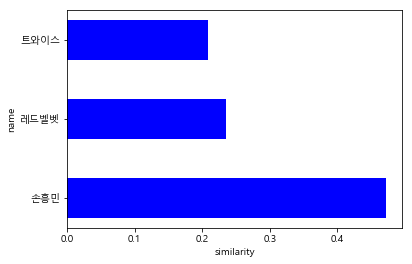

In [37]:
li=top_match(critics,'BTS',3)

nameList=[]
scoreList=[]
for i in li:
    scoreList.append(i[0])
    nameList.append(i[1])
    
myBar(scoreList, nameList)

In [42]:
critics = {
    '레드벨벳': {
        '택시운전사': 2.5,
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '넘버3': 3.5,
        '사랑과전쟁': 2.5,
        '세계대전': 3.0,
    },
    'BTS': {
        '택시운전사': 1.0,
        '겨울왕국': 4.5,
        '리빙라스베가스': 0.5,
        '넘버3': 1.5,
        '사랑과전쟁': 4.5,
        '세계대전': 5.0,
    },
    '블랙핑크': {
        '택시운전사': 3.0,
        '겨울왕국': 3.5,
        '리빙라스베가스': 1.5,
        '넘버3': 5.0,
        '세계대전': 3.0,
        '사랑과전쟁': 3.5,
    },
    '소녀시대': {
        '택시운전사': 2.5,
        '겨울왕국': 3.0,
        '넘버3': 3.5,
        '세계대전': 4.0,
    },
    '마마무': {
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '세계대전': 4.5,
        '넘버3': 4.0,
        '사랑과전쟁': 2.5,
    },
    '오마이걸': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '리빙라스베가스': 2.0,
        '넘버3': 3.0,
        '세계대전': 3.5,
        '사랑과전쟁': 2.0,
    },
    '모모랜드': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '세계대전': 3.0,
        '넘버3': 5.0,
        '사랑과전쟁': 3.5,
    },
    '우주소녀': {'겨울왕국': 4.5, '사랑과전쟁': 1.0,
             '넘버3': 4.0},
}


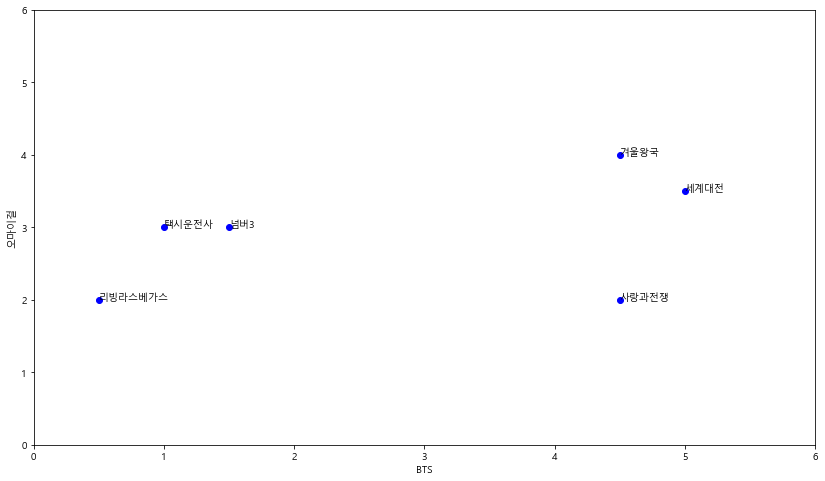

In [53]:
def scoreGraph(data, n1,n2):
    plt.figure(figsize=(14,8))
    li1=[]
    li2=[]
    for i in data[n1]: #BTS가 본 영화중에
        if i in data[n2]: #블랙핑크도 봤다면
            li1.append(data[n1][i])
            li2.append(data[n2][i])
            plt.text(data[n1][i],data[n2][i],i) #좌표,좌표,text
    plt.plot(li1, li2,'bo')
    plt.xlabel(n1)
    plt.ylabel(n2)
    plt.axis([0,6,0,6])
    plt.show()
scoreGraph(critics, 'BTS','오마이걸')

## 피어슨 상관계수

In [76]:
def sim_pearson(data, n1, n2):
    #구현
    sumX=0
    sumY=0
    sumSqX=0 #x제곱의합
    sumSqY=0 #y제곱의합
    sumXY=0 #x*y의 합
    cnt=0 #영화 개수
    for i in data[n1]:
        if i in data[n2]:
            sumX+=data[n1][i]
            sumY+=data[n2][i]
            sumSqX+=pow(data[n1][i],2)
            sumSqY+=pow(data[n2][i],2)
            sumXY+=data[n1][i]*data[n2][i]
            cnt+=1
    return  (sumXY-((sumX*sumY)/cnt)) / sqrt((sumSqX-(pow(sumX,2)/cnt))* (sumSqY-(pow(sumY,2)/cnt)))

In [77]:
sim_pearson(critics, 'BTS','오마이걸')

0.41791069697885247

## 유사도 기반 추천 시스템 

#### ex) 소녀시대, 오마이걸의 피어슨상관계수 0.5이고 오마이걸이 본 "리빙라스베이거스"평점 2.0이면 소녀시대가 줄 평점은 0.5*2.0=1.0으로할 수 있다. 

In [78]:
#top_match(영화평점데이터,기준관객,등수,유사도함수)
def top_match(data, name, rank=3, simf=sim_pearson):
    simList=[]
    #sim_pearson함수를 simf라는 이름으로 사용하겠다    
    for i in data:
        if name!=i: #BTS(자기 자신)을 제외
            simList.append((simf(data, name, i),i))
    simList.sort() #오름차순
    simList.reverse() #역순(내림차순)
    return simList[:rank]

print(top_match(critics, 'BTS', 5))
#critics에서 BTS와 공통으로 본 영화중에서,
#상관계수가 가장 높은 5명을 추출
#상관계수, 블랙핑크
#상관계수, 트와이스
#...

[(0.5692099788303083, '소녀시대'), (0.41791069697885247, '오마이걸'), (0.21693045781865616, '블랙핑크'), (0.15430334996209194, '마마무'), (0.05477225575051661, '레드벨벳')]


In [79]:
def recommendation(data, person, simf=sim_pearson):
    #              평점, 소녀시대
    res=top_match(data, person, len(data))
    #print(res)
    simSum=0 #상관계수(유사도)의 합   
    score_dic={} #예상 평점 총합을 저장하기 위한 dic
    sim_dic={} #유사도의 합을 저장하기 위한 dic
    myList=[]
    for sim, name in res: #0.5, BTS
        if sim<0 : continue
        for movie in data[name]:
            if movie not in data[person]:
#마마무는 봤고, 소녀시대는 안본 영화
                #name이 본 movie를 person이 보지 않았다면...                
                simSum+=sim*data[name][movie]
                score_dic.setdefault(movie,0)
                score_dic[movie]+=simSum
                
                sim_dic.setdefault(movie,0)
                sim_dic[movie]+=sim
            simSum=0 #영화 변경 -> 0으로 초기화
    
    for key in score_dic:
        score_dic[key]=score_dic[key]/sim_dic[key]#평점총합/유사도총합
        myList.append((score_dic[key],key))
    myList.sort()
    myList.reverse()
    return myList   

In [81]:
recommendation(critics, "소녀시대")
#소녀시대가 안본 영화중에서 가장 높은 예상 평점을
#갖는 영화 3편을 추천

[(3.0761574975571793, '사랑과전쟁'), (2.1938491995536373, '리빙라스베가스')]

In [112]:
myclass=pd.read_excel("영화평점.xlsx", header=1, index_col=0)

In [113]:
myclass.head()

,명량,국제시장,아바타,택시운전사,부산행,변호인,겨울왕국,기생충
고재형,NaN,NaN,4.5,3.5,4.0,NaN,4.0,4.0
김건우,4.0,4.5,NaN,NaN,NaN,3.5,2.5,NaN
박경호,4.0,5.0,4.5,NaN,2.0,3.5,0.0,5.0
박찬,4.0,5.0,3.0,NaN,4.5,3.5,3.0,5.0
김경아,4.0,4.0,NaN,4.0,4.0,3.0,4.0,5.0


In [131]:
myclass=myclass.fillna(0)

In [135]:
myclass.loc["김경아" ,:]

명량       4.0
국제시장     4.0
아바타      0.0
택시운전사    4.0
부산행      4.0
변호인      3.0
겨울왕국     4.0
기생충      5.0
Name: 김경아, dtype: float64

In [124]:
def sim_pearson(data, n1, n2):
    #구현
    sumX=0
    sumY=0
    sumSqX=0 #x제곱의합
    sumSqY=0 #y제곱의합
    sumXY=0 #x*y의 합
    cnt=0 #영화 개수
    for i in data.loc[n1, data.loc[n1, :] > 0].index:
        if data.loc[n2, i] > 0:
            sumX += data.loc[n1, i]
            sumY += data.loc[n2, i]
            sumSqX += pow(data.loc[n1, i], 2)
            sumSqY += pow(data.loc[n2, i], 2)
            sumXY += (data.loc[n1, i] * data.loc[n2, i])
            cnt += 1
    return  (sumXY-((sumX*sumY)/cnt)) / sqrt((sumSqX-(pow(sumX,2)/cnt))* (sumSqY-(pow(sumY,2)/cnt)))


In [127]:
#top_match(영화평점데이터,기준관객,등수,유사도함수

def top_match(data, name, rank=3, simf=sim_pearson):
    simList=[]
    #sim_pearson함수를 simf라는 이름으로 사용하겠다    
    for i in data:
        if name!=i: #자기 자신을 제외
            simList.append((simf(data, name, i),i))
    simList.sort() #오름차순
    simList.reverse() #역순(내림차순)
    return simList[:rank]


In [130]:
print(top_match(myclass,"김경아",5))

KeyError: '명량'